<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Цель исследования - определить рыночную стоимость объектов недвижимости и установить параметры. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных, например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\ANN\Downloads/real_estate.csv')    
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,airports_nearest_isna,price_m2,weekday,month,year,floor_groupes,living_ratio,kitchen_ratio
0,20,13000000.0,108.00,2019-03-07,3,2.700000,16.0,51.00,8,False,...,755.0,1714.0,0,120370.4,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.644470,11.0,18.60,1,False,...,NaN,81.0,0,82920.8,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.803709,5.0,34.30,4,False,...,574.0,558.0,0,92785.7,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.803709,14.0,NaN,9,False,...,234.0,424.0,0,408176.1,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.030000,14.0,32.00,13,False,...,48.0,121.0,0,100000.0,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.632759,12.0,14.40,5,False,...,3000.0,55.0,1,95065.8,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.630292,26.0,10.60,6,False,...,NaN,155.0,0,99195.7,3,11,2017,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.803709,24.0,NaN,22,False,...,NaN,1672.0,0,110544.7,3,4,2019,другой,NaN,0.263966
8,20,2900000.0,33.16,2018-05-23,1,2.922383,27.0,15.43,26,False,...,3000.0,189.0,1,87454.8,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.500000,9.0,43.60,7,False,...,NaN,289.0,0,88524.6,6,2,2017,другой,0.714754,0.106557


Согласно документации к данным: </b></font><br>

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

С помощью метода info() получим информацию о названиях колонок, количестве строк. </b></font><br>В таблице - 22 столбцa, тип данных - int, float и object. </b></font><br>Количество значений в столбцах различается, значит в данных есть пропущенные значения.</b></font><br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23699 non-null  int64  
 1   last_price             23699 non-null  float64
 2   total_area             23699 non-null  float64
 3   first_day_exposition   23699 non-null  object 
 4   rooms                  23699 non-null  int64  
 5   ceiling_height         23699 non-null  float64
 6   floors_total           23699 non-null  float64
 7   living_area            21796 non-null  float64
 8   floor                  23699 non-null  int64  
 9   is_apartment           23699 non-null  bool   
 10  studio                 23699 non-null  bool   
 11  open_plan              23699 non-null  bool   
 12  kitchen_area           21421 non-null  float64
 13  balcony                23699 non-null  object 
 14  locality_name          23650 non-null  object 
 15  ai

Проверим количество пропусков в процентном соотношении:

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 0%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 0%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 0%
locality_name - 0%
airports_nearest - 23%
cityCenters_nearest - 23%
parks_around3000 - 23%
parks_nearest - 43%
ponds_around3000 - 23%
ponds_nearest - 38%
days_exposition - 0%
airports_nearest_isna - 0%
price_m2 - 0%
weekday - 0%
month - 0%
year - 0%
floor_groupes - 0%
living_ratio - 8%
kitchen_ratio - 10%


### Вывод

В следующих столбцах есть пропущенные значения:</b></font><br>

ceiling_height — высота потолков (м)</b></font><br>
floors_total — всего этажей в доме</b></font><br>
living_area — жилая площадь в квадратных метрах (м²)</b></font><br>
is_apartment — апартаменты (булев тип)</b></font><br>
kitchen_area — площадь кухни в квадратных метрах (м²)</b></font><br>
balcony — число балконов</b></font><br>
locality_name — название населённого пункта</b></font><br>
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)</b></font><br>
cityCenters_nearest — расстояние до центра города (м)</b></font><br>
parks_around3000 — число парков в радиусе 3 км</b></font><br>
parks_nearest — расстояние до ближайшего парка (м)</b></font><br>
ponds_around3000 — число водоёмов в радиусе 3 км</b></font><br>
ponds_nearest — расстояние до ближайшего водоёма (м)</b></font><br>
days_exposition — сколько дней было размещено объявление (от публикации до снятия)</b></font><br>


 Часть пропусков в значениях связана с человеческим фактором - пользователи не указали нужные данные, другая часть - с техническимим неполадками, значения были получены автоматически на основе картографических данных.

## Предобработка данных

Изменим вещественный тип данных в столбце last_price на целочисленный c помощью метода astype(), потому что в дальнейшем будет проще совершать вычисления с целым числом. Проверим результат.

In [5]:
df['last_price'] = df['last_price'].astype('int')
df['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int32

В столбце ceiling_height пропущенных значений 39%. Заменим их медианой в зависимости от жилой площади. Применим функцию transform и проверим результат:

In [6]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('total_area')['ceiling_height'].transform("median"))
df['ceiling_height']

0        2.700000
1        2.644470
2        2.803709
3        2.803709
4        3.030000
           ...   
23694    3.700000
23695    2.542286
23696    2.770218
23697    3.000000
23698    2.500000
Name: ceiling_height, Length: 23699, dtype: float64

В столбце floors_total пропущенных значений 86 шт. Заменим их медианным значением и изменим вещественный тип данных  на целочисленный c помощью метода astype(). Проверим результат:

In [7]:
median_f_t = df['floors_total'].median()
df['floors_total'] = df['floors_total'].fillna(median_f_t).astype('int')
df['floors_total']

0        16
1        11
2         5
3        14
4        14
         ..
23694     5
23695     5
23696     3
23697    17
23698     5
Name: floors_total, Length: 23699, dtype: int32

Незначительное количество пропусков (8%) в столбце living_area заполним медианным значением в зависимости от жилой площади. Проверим результат:

In [8]:
median_f_t = df['living_area'].median()
df['living_area'] = df['living_area'].fillna(median_f_t).astype('int')
df['living_area']

0        51
1        18
2        34
3        30
4        32
         ..
23694    73
23695    38
23696    29
23697    30
23698    12
Name: living_area, Length: 23699, dtype: int32

В столбце is_appartment число пропущенных значений составляет 88%. Предположим, что объекты со значениями False - квартиры, объекты с значениями True - аппартаменты. Заменим пропущенные значения на False и проверим результат:

In [9]:
columns_to_replace_2 = ['is_apartment']

for column in columns_to_replace_2:
    df[column] = df[column].fillna('False')
    
df['is_apartment'].isna().sum()

0

В столбце kitchen_area пропущенных значений 10%. Заменим их медианой в зависимости от жилой площади. Применим функцию transform и проверим результат:

In [10]:
df['kitchen_area'] = df['kitchen_area'].fillna(df.groupby('total_area')['kitchen_area'].transform('median'))
df['kitchen_area']

0        25.00
1        11.00
2         8.30
3        15.00
4        41.00
         ...  
23694    13.83
23695     8.50
23696     8.40
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

Пропущенные значения в столбце balcony составляют 49% от общего числа значений(почти половина). Возможно в этих квартирах балконы отсутствуют, поэтому можем заменить пропуски на ноль. Проверим результат:

In [11]:
columns_to_replace = ['balcony']

for column in columns_to_replace:
    df[column] = df[column].fillna('0')
    
df['balcony'].isna().sum()

0

В столбце cityCenters_nearest - расстояние до центра города доля пропусков составляет 23%. Пропуски заменим на ноль и изменим тип данных. Метры переведем в километры.

In [12]:
for column in columns_to_replace:
    df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna('0').astype('int')
    df['cityCenters_nearest'] = df['cityCenters_nearest'] / 1000
df['cityCenters_nearest'].isna().sum()

0

## Расчёты и добавление результатов в таблицу

Добавим в таблицу столбец price_per_squaremeter, изменим тип данных на целочисленный и проверим результат:

In [13]:
df['price_per_squaremeter'] = df['last_price']/df['total_area']
df['price_per_squaremeter'].astype('int')

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_squaremeter, Length: 23699, dtype: int32

Методом pd.to_datetime() переведем значения столбца first_day_exposition - дата публикации в объекты datetime. Создадим столбец weekday, где 0 - понедельник, 6 - воскресенье. Проверим результат:

In [14]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['weekday'] = df['first_day_exposition'].dt.weekday
df['weekday']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday, Length: 23699, dtype: int64

Создадим столбец month с указанием месяца публикации объявления.

In [15]:
df['month'] = df['first_day_exposition'].dt.month
df['month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month, Length: 23699, dtype: int64

Создадим столбец year с указанием года публикации объявления.

In [16]:
df['year'] = df['first_day_exposition'].dt.year
df['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23699, dtype: int64

Создадим столбец floor_type с типами этажей: первый, последний и другой. Проверим результат:

In [17]:
def floor_grouped(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
         return 'другой'
df['floor_type']=df.apply(floor_grouped, axis=1)
df['floor_type']

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_type, Length: 23699, dtype: object

Добавим в таблицу столбец ratio_liv_to_total, где будет указано соотношение жилой и общей площади, выведем на экран:

In [18]:
df['ratio_liv_to_total'] = df['living_area']/df['total_area']
df['ratio_liv_to_total']

0        0.472222
1        0.445545
2        0.607143
3        0.188679
4        0.320000
           ...   
23694    0.545550
23695    0.644068
23696    0.511464
23697    0.390879
23698    0.371517
Name: ratio_liv_to_total, Length: 23699, dtype: float64

Добавим в таблицу столбец ratio_kitch_to_total, где будет указано площади кухни к общей площади, выведем на экран:

In [19]:
df['ratio_kitch_to_total'] = df['kitchen_area']/df['total_area']
df['ratio_kitch_to_total']

0        0.231481
1        0.272277
2        0.148214
3        0.094340
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696    0.148148
23697    0.303583
23698    0.278638
Name: ratio_kitch_to_total, Length: 23699, dtype: float64

## Исследовательский анализ данных

С помощью метода plot() построим гистограмму и проверим, как распределяются значения общей площади(столбец total_area).
С помощью describe() получим статистику по данному столбцу. </b></font><br>
Больше всего квартир на рынке, площадь которых составляет от 40 до 50 кв.м. Есть квартиры с площадью менее 30 кв.м и более 150 кв.м. такие данные можно считать выбросами.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

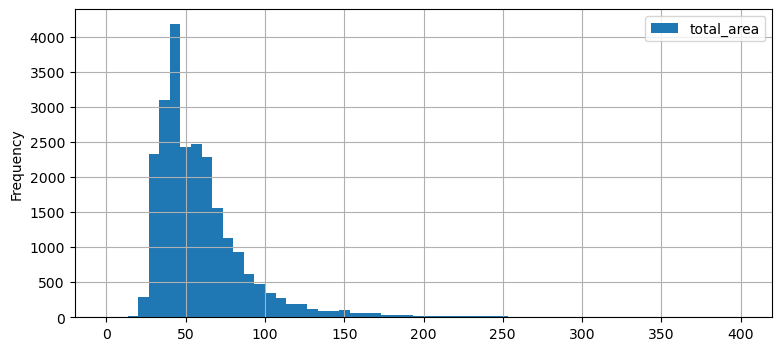

In [20]:
df.plot(y = 'total_area', kind = 'hist', bins = 60, grid=True, figsize = (9,4), range = (0,400))
df['total_area'].describe()

С помощью метода plot() построим гистограммуи проверим, как распределяются значения стоимости квартир (столбец last_price).
С помощью describe() получим статистику по данному столбцу. </b></font><br>
По гисторграмме мы видим, на рынке недвижимости колличественно преобладают квартиры со стоимостью от 3 млн.руб. до 4,5 млн.руб. В меньше количестве на рынке представлены квартиры по цене от 4,5  млн.руб. до 8 млн.руб.</b></font><br>
Квартиры с ценой менее 1 млн. руб. и более 50  млн. руб. можно считать выбросами.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

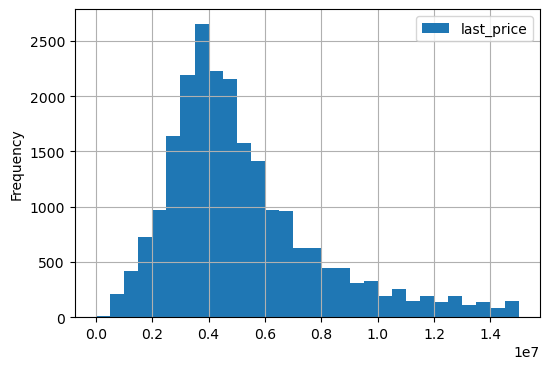

In [21]:
df.plot(y = 'last_price', kind = 'hist', bins = 30, grid=True, figsize = (6,4), range = (0,15000000))
df['last_price'].describe()

С помощью метода plot() построим гистограммуи проверим, как распределяются значения количества комнат (столбец rooms).
С помощью describe() получим статистику по данному столбцу. </b></font><br>
По гисторграмме мы видим, на рынке недвижимости колличественно преобладают однокомнатные квартиры, двухкомнатных квартир незначительно меньше, в меньшем количестве - квартиры с тремя, четырьмя,пятью и шестью комнатами.  </b></font><br>
Есть объекты с 19 комнатами, эти данные можно считать выбросами. 

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

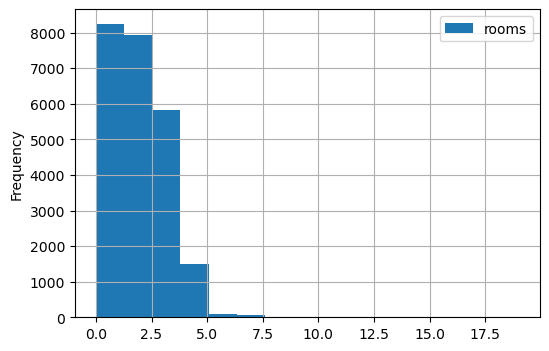

In [22]:
df.plot(y = 'rooms', kind = 'hist', bins = 15, grid=True, figsize = (6,4))
df['rooms'].describe()

С помощью метода plot() построим гистограммуи проверим, как распределяются значения высоты потолков (столбец ceiling_height).
С помощью describe() получим статистику по данному столбцу.   </b></font><br>
По гисторграмме мы видим, что на рынке преобладают квартиры с высотой потолков от 2,7м. до 3,8м.
В меньшем количестве представлены квартиры с высотой потолков от 2м. до 2,7м. Также есть незначительное количество квартир с высотой потолков от 3м. до 4,5м.  </b></font><br>
Квартиры с высотой потолков менее 2м и более 10м. можно считать выбросами. 

count    23699.000000
mean         2.770218
std          1.001795
min          1.000000
25%          2.600000
50%          2.725271
75%          2.803709
max        100.000000
Name: ceiling_height, dtype: float64

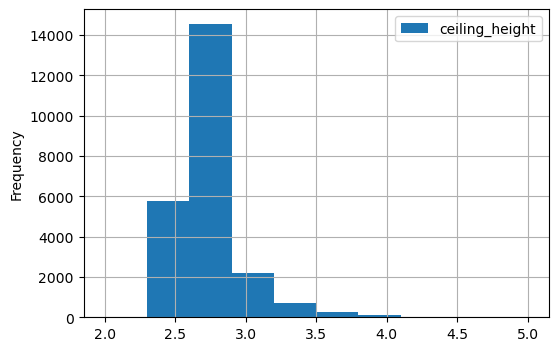

In [23]:
df.plot(y ='ceiling_height', kind = 'hist', bins = 10, range = (2,5), grid=True, figsize = (6,4))
df['ceiling_height'].describe()

С помощью метода plot() построим гистограммуи проверим, как распределяется количество дней размещения объявления (от публикации до снятия, столбец days_exposition).
С помощью describe() получим статистику по данному столбцу. Видим, что среднее значение (180) почти в два раза больше медианы (95), что говорит о том, что у гистограммы есть "хвост" - выбросы.</b></font><br>
По гисторграмме мы видим, что наибольшее количество объевлений выставляется на срок до 100 дней. Можно считать, что продажи прошли необычно быстро, если срок продажи составит меньше 31 дня, необычно долго, если срок продажи - больше 270 дней; </b></font><br>

count    23699.000000
mean       408.232668
std        622.657941
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       3275.000000
Name: days_exposition, dtype: float64

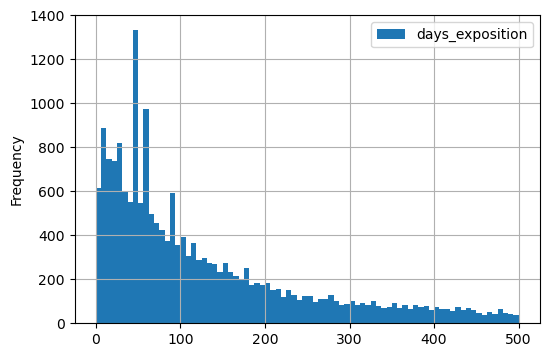

In [24]:
df.plot(y ='days_exposition', kind = 'hist', bins = 80, range = (0, 500), grid=True, figsize = (6,4))
df['days_exposition'].describe()

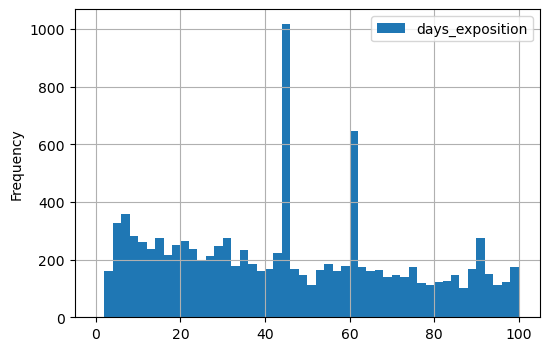

In [25]:
df.plot(y ='days_exposition', kind = 'hist', bins = 50, range = (0, 100), grid=True, figsize = (6,4));

Проверим долю объявлений, которые были высталены более чем на 270 дней. </b></font><br>
Доля  сотавляет 18%.

In [26]:
len(df.query('days_exposition > 270')) / len(df)

0.3204776572851175

Удалим из столбца значения больше 270. Проверим результат.

In [27]:
df = df.query('days_exposition < 270')
len(df.query('days_exposition > 270')) / len(df)

0.0

С помощью метода plot() построим гистограмму и проверим, как распределятся значения, после того, как удалили выбросы.
С помощью describe() получим статистику по данному столбцу. </b></font><br>
Изменилось среднее значение и медианное - 108 и 91. Разница между эти значениями существенно сократилась после удаления выбросов.

count    16089.000000
mean        86.993536
std         67.815603
min          1.000000
25%         34.000000
50%         65.000000
75%        130.000000
max        269.000000
Name: days_exposition, dtype: float64

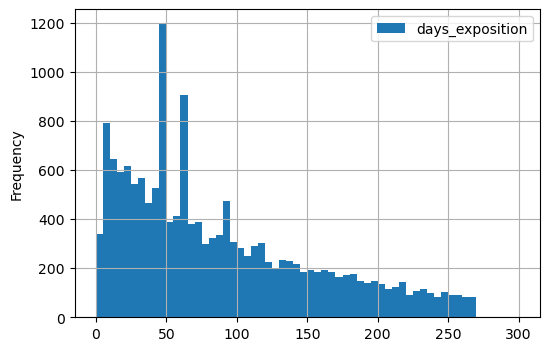

In [28]:
df.plot(y ='days_exposition', kind = 'hist', bins = 60, range = (0, 300), grid=True, figsize = (6,4))
df['days_exposition'].describe()

С помощью pd.plotting.scatter_matrix(df) построим матрицу диграмм рассенивания, с помощью параметра corr() найдем коофицент корреляции между величинами.</b></font><br> Проверим, как влияет на стоимость квартир такие факторы, как площадь, число комнат и удаленность от центра.</b></font><br>
Цена к расстоянию до центра - корреляция слабая - цена незначительно зависит от расположения квартиры;</b></font><br>
цена к общей площади квартиры - корреляция средняя  - на графике видим увеличение стоимости с увеличением площади; </b></font><br>
цена к количеству комнат - корреляция слабая - цена незначительно увеличивается от количества комнат.

                     last_price  cityCenters_nearest  living_area     rooms
last_price             1.000000            -0.087363     0.608637  0.447624
cityCenters_nearest   -0.087363             1.000000    -0.117485 -0.086061
living_area            0.608637            -0.117485     1.000000  0.811379
rooms                  0.447624            -0.086061     0.811379  1.000000


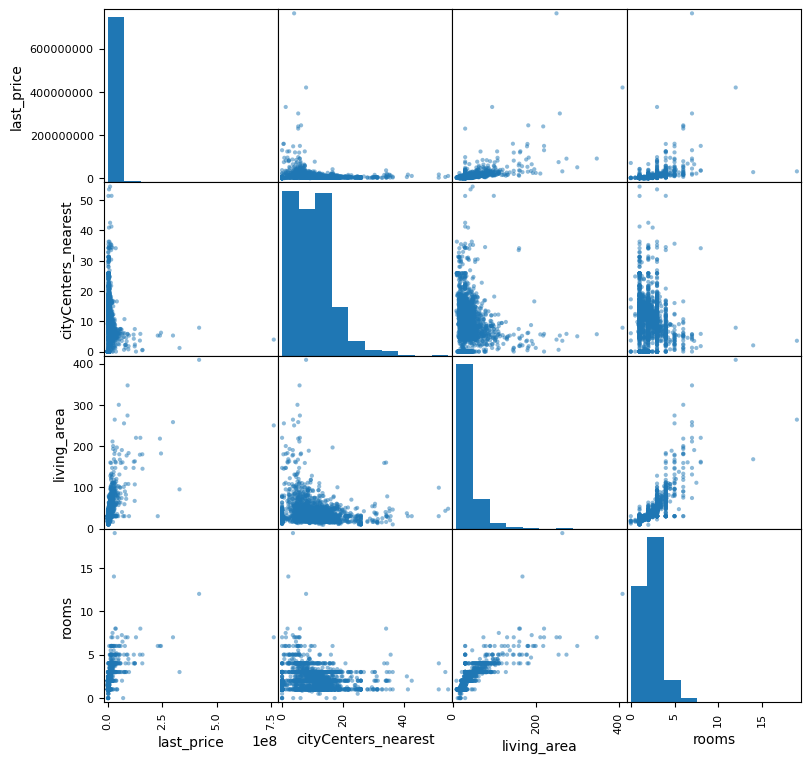

In [29]:
df_pivot = df.pivot_table(index='last_price',
    values=['rooms','living_area','cityCenters_nearest'], aggfunc='mean').reset_index()
print(df_pivot.corr())
pd.plotting.scatter_matrix(df_pivot, figsize=(9,9));

In [30]:
df_pivot

,last_price,cityCenters_nearest,living_area,rooms
0,12190,9.176,32.0,2.00
1,430000,0.000,30.0,2.00
2,440000,0.000,30.0,1.00
3,450000,0.000,25.0,1.75
4,470000,0.000,31.0,1.00
...,...,...,...,...
2153,245000000,6.235,182.0,6.00
2154,300000000,5.297,258.0,7.00
2155,330000000,1.197,95.0,3.00
2156,420000000,7.877,409.0,12.00


Построим диаграмму с помощью метода plot(), проверим влияет ли этаж(превый, последний, другой) на стоимость.</b></font><br>
На диаграмме видим, что стоимость квартир на первом этаже ниже, чем на последнем и другом. Самые дорогие квартиры - на последнем.

C:\Users\Ann\AppData\Local\Temp\ipykernel_9372\30491911.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('floor_type').mean().reset_index().plot(kind='bar', x='floor_type', y='last_price');


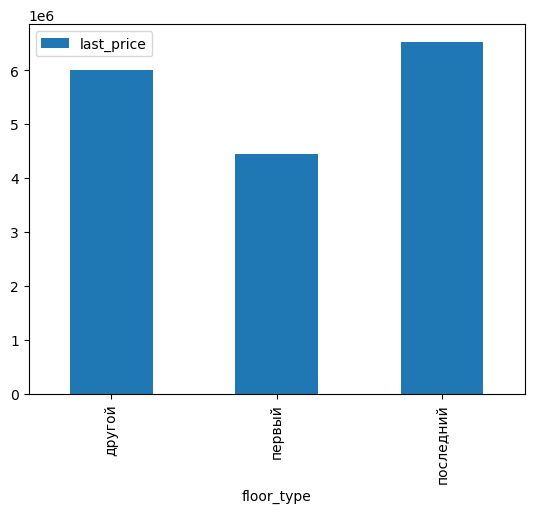

In [31]:
df.groupby('floor_type').mean().reset_index().plot(kind='bar', x='floor_type', y='last_price');

Построим диаграмму с помощью метода plot(), проверим влияет ли день(0-понедельник, 6-воскресенье),когда было выставлено объявление о продаже, на стоимость.</b></font><br>
На диаграмме видим, что самая высокая стоимость у квартир, объявления, о которых были выставлены в субботу, незначительно выше - объвления выставлены в среду, ниже этой стоимости - квартиры, объявления, о которых были выставлены в понедельник, вторник, четверг и пятницу.

C:\Users\Ann\AppData\Local\Temp\ipykernel_9372\3393990691.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('weekday').mean().reset_index().plot(kind='bar', x='weekday', y='last_price');


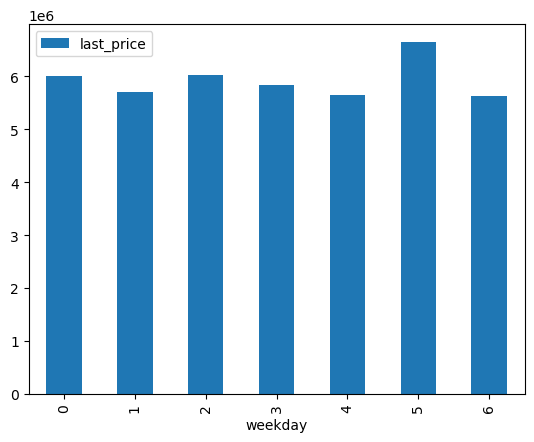

In [32]:
df.groupby('weekday').mean().reset_index().plot(kind='bar', x='weekday', y='last_price');

Построим диаграмму с помощью метода plot(), проверим влияет ли месяц(1-январь, 12-декабрь),когда было выставлено объявление о продаже, на стоимость.</b></font><br>
На диаграмме видим, что самая высокая стоимость у квартир, объявления, о которых были выставлены в апреле, сентябре, ноябре, декабре.

C:\Users\Ann\AppData\Local\Temp\ipykernel_9372\3888577819.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean().reset_index().plot(kind='bar', x='month', y='last_price');


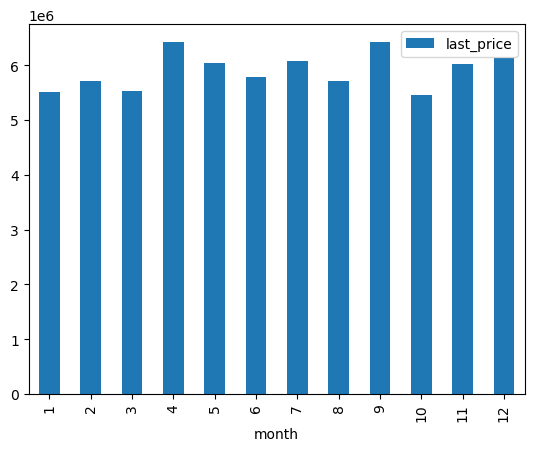

In [33]:
df.groupby('month').mean().reset_index().plot(kind='bar', x='month', y='last_price');

Построим диаграмму с помощью метода plot(), проверим влияет ли год, когда было выставлено объявление о продаже, на стоимость.</b></font><br>
На диаграмме видим, что высокая стоимость у квартир, объявления, о которых были выставлены в 2016,2017,2019г., в 2015 и 2018гг. стоимость квартир была незначительно ниже.

C:\Users\Ann\AppData\Local\Temp\ipykernel_9372\1836297085.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').mean().reset_index().plot(kind='bar', x='year', y='last_price');


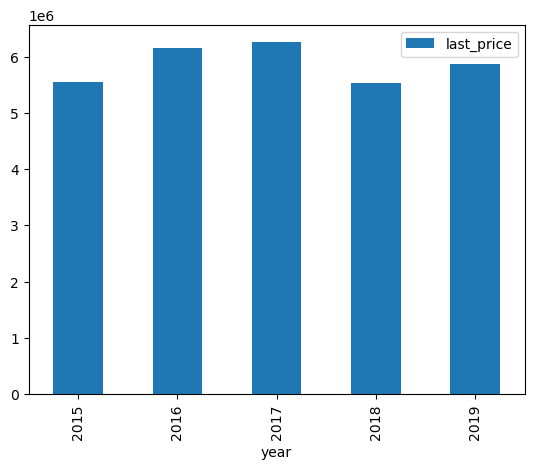

In [34]:
df.groupby('year').mean().reset_index().plot(kind='bar', x='year', y='last_price');

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах.
Самая высокая стоимость жилья - в Санкт-Петербурге (средняя цена за квадратный метр 114849 руб.), самая низкая - в Выборге (58141 руб. за квадратный метр).

In [35]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_squaremeter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table.sort_values('count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,10673,111032.460561
посёлок Мурино,470,86121.063216
посёлок Шушары,343,78274.220361
Колпино,261,74847.459480
Всеволожск,254,69350.908320
посёлок Парголово,244,88962.029949
Пушкин,233,100838.038351
деревня Кудрово,232,93015.131866
Гатчина,207,68620.146245


Посчитаем среднюю цену для каждого километра - значение aver_price. 

In [36]:
df['price_km'] = df['last_price'] / df['cityCenters_nearest']
aver_price = df.groupby('cityCenters_nearest')['price_km'].mean()

С помощью метода plot() построим график, который покажет, как цена зависит от удалённости от центра.</b></font><br>
На графике видим, что цена резко увеличивается на отметке 5 км. Окружность с радиусом 5км будем считать центром города.

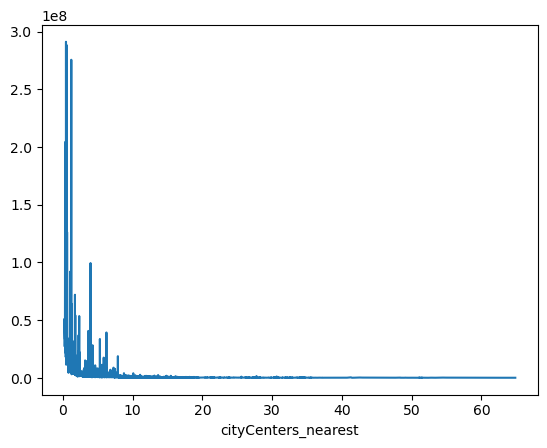

In [37]:
aver_price.plot();    

С помощью pd.plotting.scatter_matrix(df) построим матрицу диграмм рассенивания, с помощью параметра corr() найдем коофицент корреляции между величинами.</b></font><br> Проверим, как влияет на стоимость квартир такие факторы, как высота потолков, площадь и число комнат.</b></font><br>
Цена к высоте потолков - корреляция слабая - цена незначительно зависит от высоты потолков;</b></font><br>
цена к общей площади квартиры - корреляция средняя  - на графике видим увеличение стоимости с увеличением площади; </b></font><br>
цена к количеству комнат - корреляция слабая - цена незначительно увеличивается от количества комнат.

                last_price  ceiling_height  living_area     rooms
last_price        1.000000        0.074117     0.496441  0.297218
ceiling_height    0.074117        1.000000     0.270118  0.156150
living_area       0.496441        0.270118     1.000000  0.788924
rooms             0.297218        0.156150     0.788924  1.000000


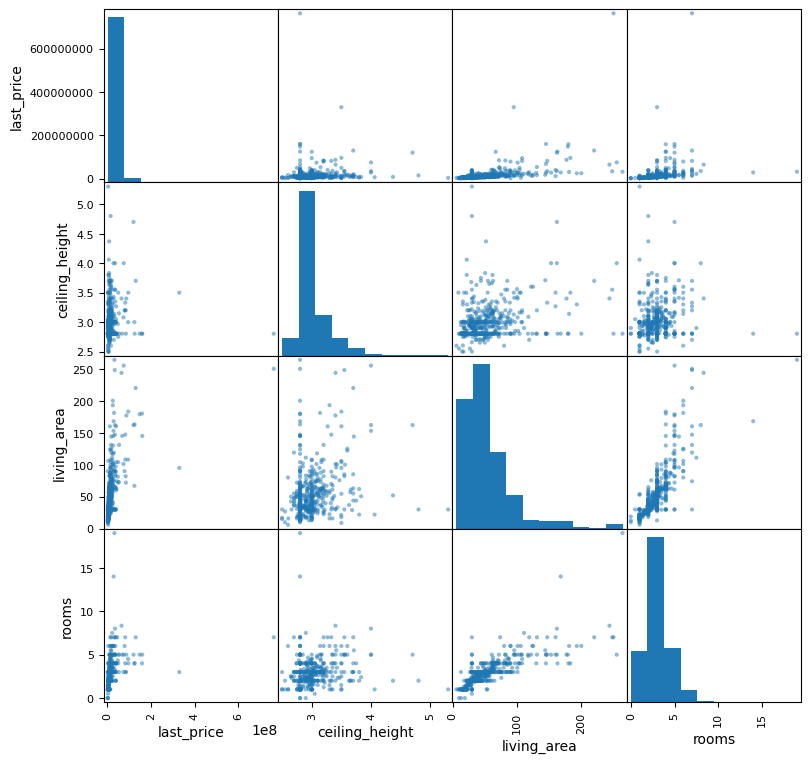

In [38]:
center_spb = df.query('cityCenters_nearest <= 5 and locality_name == "Санкт-Петербург"')
center_spb_pivot = center_spb.pivot_table(index = 'last_price', values = ['rooms', 'living_area', 'ceiling_height'], aggfunc = 'mean').reset_index()
    
print(center_spb_pivot.corr())
pd.plotting.scatter_matrix(center_spb_pivot, figsize=(9,9));

Построим диаграмму с помощью метода plot(), проверим влияет ли этаж(превый, последний, другой) на стоимость.</b></font><br>
На диаграмме видим, что стоимость квартир на первом этаже ниже, чем на последнем и другом. Самые дорогие квартиры - на последнем.

C:\Users\Ann\AppData\Local\Temp\ipykernel_9372\2221067922.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  center_spb.groupby('floor_type').mean().reset_index().plot(kind='bar', x='floor_type', y='last_price')


<Axes: xlabel='floor_type'>

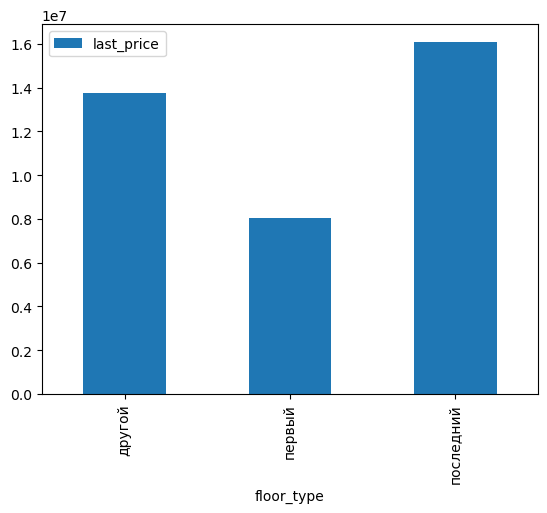

In [39]:
center_spb.groupby('floor_type').mean().reset_index().plot(kind='bar', x='floor_type', y='last_price')

Построим диаграмму с помощью метода plot(), проверим влияет ли день недели, месяц, год объявления о продаже на стоимость квартиры.</b></font><br>
На диаграмме видим, что самая высокая стоимость у квартир, объявления, о которых были выставлены в среду, четверг и воскресенье; ниже этой стоимости - квартиры, объявления, о которых были выставлены в понедельник, вторник, пятницу и субботу.</b></font><br>
На второй диграмме: самая высокая стоимость у квартир, объявления, о которых были выставлены в мае.</b></font><br>
На третьей диаграмме: высокая стоимость у квартир, объявления, о которых были выставлены в 2016; в 2017, 2018 и 2019 годах стоимость была незначительно ниже; в 2015г. средняя стоимость квартир не превышала 5млн.

C:\Users\Ann\AppData\Local\Temp\ipykernel_9372\619214968.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  center_spb.groupby('weekday').mean().reset_index().plot(kind='bar', x='weekday', y='last_price');


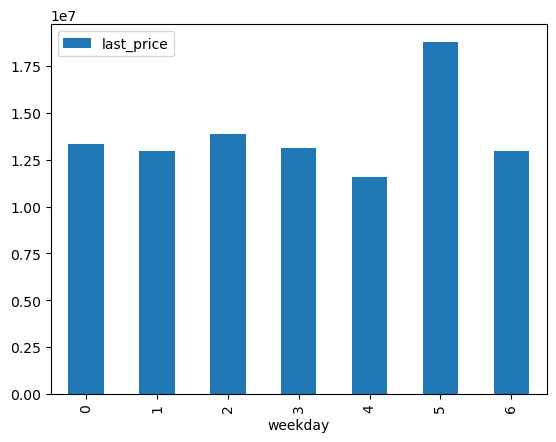

In [40]:
center_spb.groupby('weekday').mean().reset_index().plot(kind='bar', x='weekday', y='last_price');

C:\Users\Ann\AppData\Local\Temp\ipykernel_9372\3812494780.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  center_spb.groupby('month').mean().reset_index().plot(kind='bar', x='month', y='last_price')
C:\Users\Ann\AppData\Local\Temp\ipykernel_9372\3812494780.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  center_spb.groupby('year').mean().reset_index().plot(kind='bar', x='year', y='last_price')


<Axes: xlabel='year'>

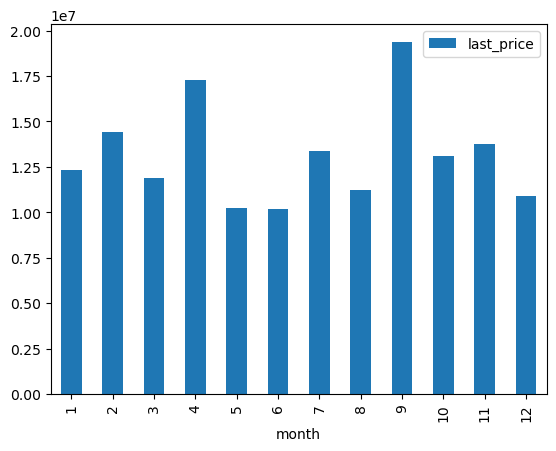

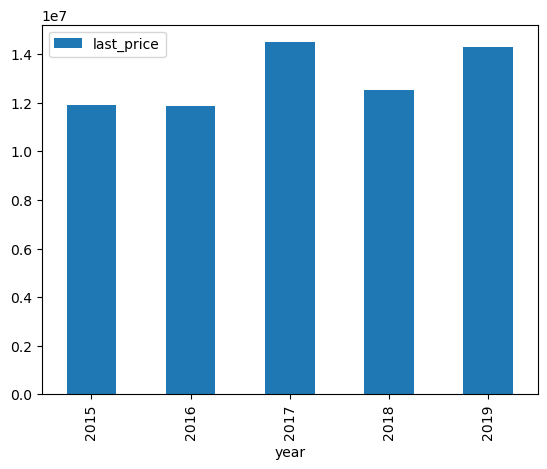

In [41]:

center_spb.groupby('month').mean().reset_index().plot(kind='bar', x='month', y='last_price')
center_spb.groupby('year').mean().reset_index().plot(kind='bar', x='year', y='last_price')

С помощью метода plot() построим график, который покажет, как распределяется стоимость квартир в центре города.
На графике видим, стоимость растет начиная с отметки 1 км.

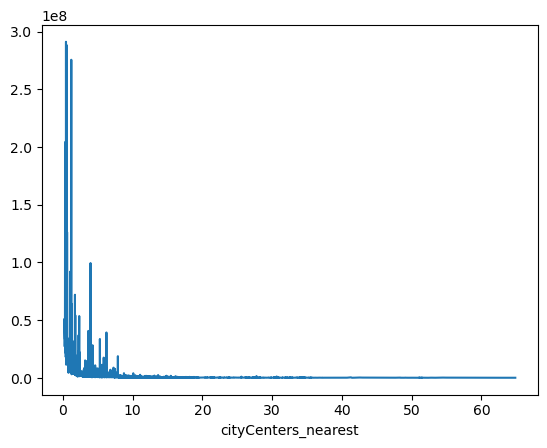

In [42]:
aver_price = df.groupby('cityCenters_nearest')['price_km'].mean()
aver_price.plot(); 

## Общий вывод

Мы провели исследование стоимости объектов недвижимости на рынке Санкт-Петербурга. Для этого выделили следующие параметры: площадь, число комнат, этаж, высота потолков, этаж, удаленность от центра и дата размещения обявлений о продаже.</b></font><br>
В исследовании рассмотрели данные об объектах, находящихся в Санкт-Петербурге, и удаленных от него, а также область, входящую в центр города (центр определили как радиус 5 км.).
    В ходе исследолвания выяснили, что на стоимость квартир влияет такой параметр, как общая общая площадь, чем больше площадь, тем выше стоимость; параметр этаж - квартиры на первом этаже - дешевле, на последнем - самые дорогие; </b></font><br>удаленность от центра - цена начинает расти в определенной области - центре города, за пределеми этой области удаленность не влияет на стоимость;</b></font><br>
день недели - самая высокая стоимость у квартир, объявления, о которых были выставлены в субботу, по данным о центре города - самая высокая стоимость у квартир, объявления, о которых были выставлены в в среду, четверг и воскресенье;</b></font><br>
высокая стоимость у квартир, объявления, о которых были выставлены в апреле, сентябре, ноябре, декабре; по данным о центре города - в мае были выставлены объявления о самых дорогих квартирах;</b></font><br>
в 2016, 2017, 2019г. стоимость квартир была высокой, в 2015 и 2018гг. была значительно ниже, по данным о центре города - в 2016г. стоимость была высокой, в 2017 - 2019гг. - незначительно ниже, существенный спад стоимости был в 2015 г.</b></font><br> 
высота потолков не влият на стоимость квартир.    

Считаю, что данных параметров недостаточно для определения факторов, влияющих на стоимость, которая также может зависеть от года постройки дома и удалеености от ближайшей станции метро.
